In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,data_id,period,c1,c2,c3,c4,c5,c6,c7,c8,...,c80,c81,c82,c83,c84,c85,c86,c87,c88,target
0,2,train1,0.655570,-0.000022,-0.000539,-0.001075,0.0,0.0,0.213390,0.0,...,-0.023358,-0.017041,0.0,0.060697,0.0,0.0,0.000000,-0.000202,-0.140220,1
1,3,train1,1.646430,-0.000292,-0.008367,0.009497,0.0,0.0,0.000000,0.0,...,-0.059429,-0.009109,0.0,0.021645,0.0,0.0,0.000000,-0.004382,0.455767,0
2,5,train1,-0.743010,0.004642,-0.000647,-0.003290,0.0,0.0,0.000000,0.0,...,0.001796,-0.000104,0.0,-0.024718,0.0,0.0,0.219566,0.072711,1.155580,0
3,7,train1,0.029770,-0.006343,-0.000635,-0.002516,0.0,0.0,0.160313,0.0,...,-0.005501,0.045308,0.0,-0.148852,0.0,0.0,0.000000,-0.101181,-0.954553,0
4,10,train1,-0.660243,0.012591,-0.002098,-0.022264,0.0,0.0,0.000000,0.0,...,0.029034,-0.005847,0.0,-0.007073,0.0,0.0,0.000000,-0.004842,0.436002,0


In [3]:
df1 = df[df.period == "train1"]
df1.head()

,data_id,period,c1,c2,c3,c4,c5,c6,c7,c8,...,c80,c81,c82,c83,c84,c85,c86,c87,c88,target
0,2,train1,0.655570,-0.000022,-0.000539,-0.001075,0.0,0.0,0.213390,0.0,...,-0.023358,-0.017041,0.0,0.060697,0.0,0.0,0.000000,-0.000202,-0.140220,1
1,3,train1,1.646430,-0.000292,-0.008367,0.009497,0.0,0.0,0.000000,0.0,...,-0.059429,-0.009109,0.0,0.021645,0.0,0.0,0.000000,-0.004382,0.455767,0
2,5,train1,-0.743010,0.004642,-0.000647,-0.003290,0.0,0.0,0.000000,0.0,...,0.001796,-0.000104,0.0,-0.024718,0.0,0.0,0.219566,0.072711,1.155580,0
3,7,train1,0.029770,-0.006343,-0.000635,-0.002516,0.0,0.0,0.160313,0.0,...,-0.005501,0.045308,0.0,-0.148852,0.0,0.0,0.000000,-0.101181,-0.954553,0
4,10,train1,-0.660243,0.012591,-0.002098,-0.022264,0.0,0.0,0.000000,0.0,...,0.029034,-0.005847,0.0,-0.007073,0.0,0.0,0.000000,-0.004842,0.436002,0


In [ ]:
df2 = df[df.period == "train2"]
df2.head()

In [ ]:
df.describe()

In [ ]:
df1.describe()

In [ ]:
df2.describe()

In [4]:
dfc = df.iloc[:, 2:90]
standardized_df = (dfc - dfc.mean()) / dfc.std()
features = standardized_df.as_matrix()
features.shape

(560000, 88)

In [5]:
feature_names = df.columns[2:90]
feature_names

Index([u'c1', u'c2', u'c3', u'c4', u'c5', u'c6', u'c7', u'c8', u'c9', u'c10',
       u'c11', u'c12', u'c13', u'c14', u'c15', u'c16', u'c17', u'c18', u'c19',
       u'c20', u'c21', u'c22', u'c23', u'c24', u'c25', u'c26', u'c27', u'c28',
       u'c29', u'c30', u'c31', u'c32', u'c33', u'c34', u'c35', u'c36', u'c37',
       u'c38', u'c39', u'c40', u'c41', u'c42', u'c43', u'c44', u'c45', u'c46',
       u'c47', u'c48', u'c49', u'c50', u'c51', u'c52', u'c53', u'c54', u'c55',
       u'c56', u'c57', u'c58', u'c59', u'c60', u'c61', u'c62', u'c63', u'c64',
       u'c65', u'c66', u'c67', u'c68', u'c69', u'c70', u'c71', u'c72', u'c73',
       u'c74', u'c75', u'c76', u'c77', u'c78', u'c79', u'c80', u'c81', u'c82',
       u'c83', u'c84', u'c85', u'c86', u'c87', u'c88'],
      dtype='object')

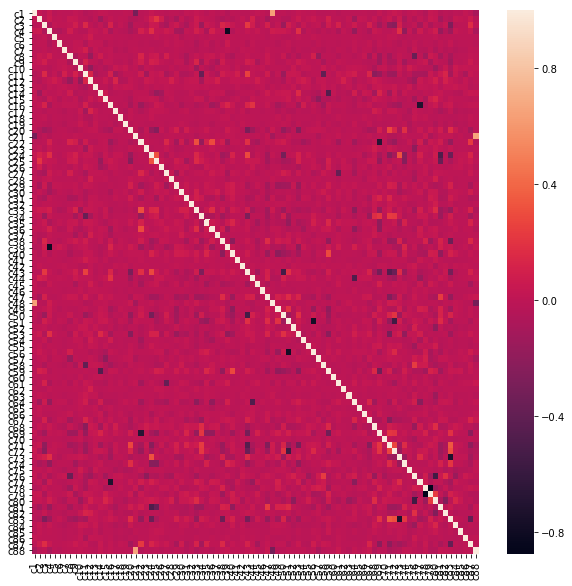

In [6]:
correlation_matrix = np.corrcoef(features.transpose())
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=False,
                xticklabels=feature_names,
                yticklabels=feature_names)
plt.show()

/home/tazume/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Yu Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


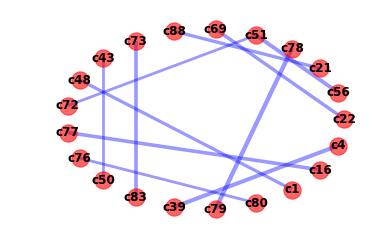

In [7]:
g = np.absolute(correlation_matrix)
nodes = feature_names
G = nx.Graph()
#G.add_nodes_from(nodes)
edges = []
for hi, hv  in enumerate(g):
    for wi, wv in enumerate(hv):
        if g[hi, wi] > 0.5 and hi != wi:
            edges.append((nodes[hi], nodes[wi], g[hi, wi]))
            #print((nodes[hi], nodes[wi], g[hi, wi]))
G.add_weighted_edges_from(edges)
#pos = nx.shell_layout(G)
pos = nx.circular_layout(G)
#nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, node_color="r",alpha=0.6, node_size=300)
nx.draw_networkx_labels(G, pos, fontsize=5, font_family="Yu Gothic", font_weight="bold")
edge_width = [ d["weight"]*5 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="b", width=edge_width)
plt.axis("off")
plt.show()

In [8]:
np.sum(correlation_matrix < -0.5)

18

In [ ]:
np.sum(correlation_matrix > 0.5) - 88

In [ ]:
np.sum(correlation_matrix < -0.8)

In [ ]:
np.sum(correlation_matrix > 0.8) - 88

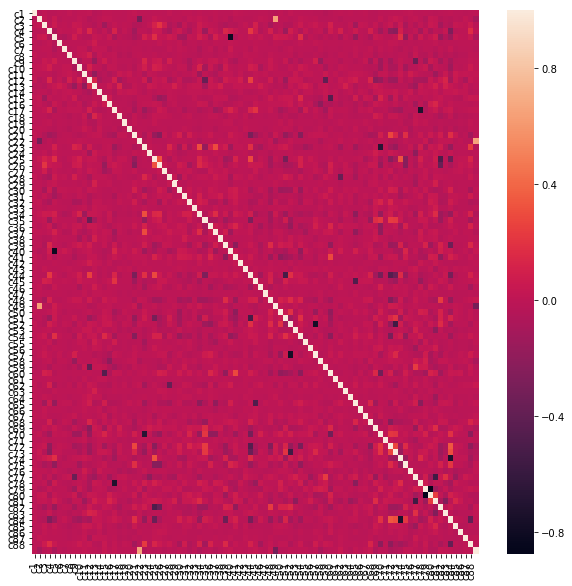

In [9]:
dft = df.iloc[:, 90].as_matrix()
correlation_matrix = np.corrcoef(dft, features, rowvar=False)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=False,
                xticklabels=feature_names,
                yticklabels=feature_names)
plt.show()

In [10]:
correlation_matrix[0][np.argsort(correlation_matrix[0])[::-1][:10]]

array([ 1.        ,  0.02092764,  0.0185224 ,  0.01786662,  0.01704131,
        0.01387046,  0.01266949,  0.01240246,  0.01074165,  0.00945358])

In [11]:
np.argsort(correlation_matrix[0])[::-1][:10]

array([ 0, 20, 75, 40, 27, 11, 51,  7, 74, 10])

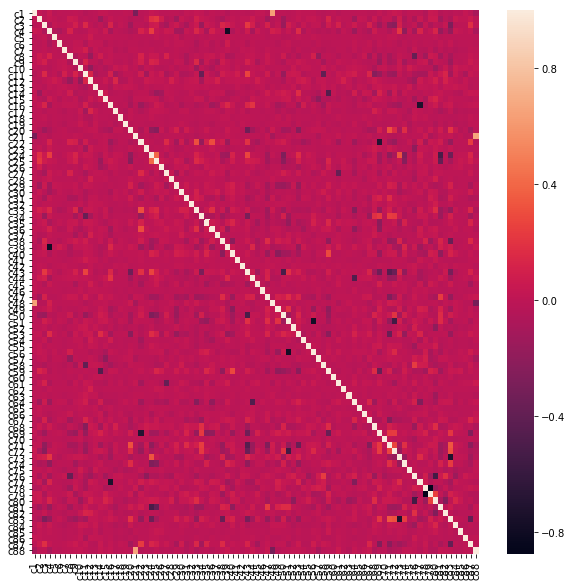

In [12]:
features = np.load("../test_npy/train_Xxmini.npy")
correlation_matrix = np.corrcoef(features.transpose())
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=False,
                xticklabels=feature_names,
                yticklabels=feature_names)
plt.show()

In [13]:
np.sum(correlation_matrix < -0.5)

20

In [14]:
np.sum(correlation_matrix > 0.5) - 88

4

In [15]:
np.sum(correlation_matrix < -0.8)

2

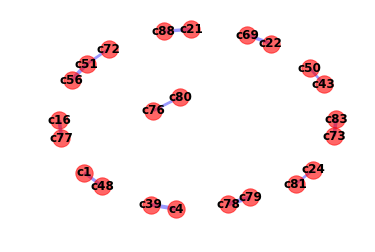

In [16]:
g = np.absolute(correlation_matrix)
nodes = feature_names
G = nx.Graph()
#G.add_nodes_from(nodes)
edges = []
for hi, hv  in enumerate(g):
    for wi, wv in enumerate(hv):
        if g[hi, wi] > 0.5 and hi != wi:
            edges.append((nodes[hi], nodes[wi], g[hi, wi]))
            #print((nodes[hi], nodes[wi], g[hi, wi]))
G.add_weighted_edges_from(edges)
#pos = nx.shell_layout(G)
#pos = nx.circular_layout(G)
pos = nx.spring_layout(G, k=0.1)
#nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, node_color="r",alpha=0.6, node_size=300)
nx.draw_networkx_labels(G, pos, fontsize=5, font_family="Yu Gothic", font_weight="bold")
edge_width = [ d["weight"]*5 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="b", width=edge_width)
plt.axis("off")
plt.show()

In [6]:
df = pd.read_csv("train.csv")
df_mean = df.iloc[:, 2:90].mean()
df_std = df.iloc[:, 2:90].std()
print("A")
df1 = df[df.period == "train1"].iloc[:, 2:90]
standardized_df1 = (df1 - df_mean / df_std)
df2 = df[df.period == "train2"].iloc[:, 2:90]
standardized_df2 = (df2 - df_mean / df_std)
df3 = df[df.period == "train3"].iloc[:, 2:90]
standardized_df3 = (df3 - df_mean / df_std)
df4 = df[df.period == "train4"].iloc[:, 2:90]
standardized_df4 = (df4 - df_mean / df_std)
df5 = df[df.period == "train5"].iloc[:, 2:90]
standardized_df5 = (df5 - df_mean / df_std)
df6 = df[df.period == "train6"].iloc[:, 2:90]
standardized_df6 = (df6 - df_mean / df_std)
df7 = df[df.period == "train7"].iloc[:, 2:90]
standardized_df7 = (df7 - df_mean / df_std)
df8 = df[df.period == "train8"].iloc[:, 2:90]
standardized_df8 = (df8 - df_mean / df_std)
df9 = df[df.period == "train9"].iloc[:, 2:90]
standardized_df9 = (df9 - df_mean / df_std)
df10 = df[df.period == "train10"].iloc[:, 2:90]
standardized_df10 = (df10 - df_mean / df_std)
df11 = df[df.period == "train11"].iloc[:, 2:90]
standardized_df11 = (df11 - df_mean / df_std)
df12 = df[df.period == "train12"].iloc[:, 2:90]
standardized_df12 = (df12 - df_mean / df_std)
df13 = df[df.period == "train13"].iloc[:, 2:90]
standardized_df13 = (df13 - df_mean / df_std)
df14 = df[df.period == "train14"].iloc[:, 2:90]
standardized_df14 = (df14 - df_mean / df_std)

A


In [7]:
means = []
for i in range(1,15):
    means.append(eval("standardized_df{}".format(i)).mean().as_matrix())

In [8]:
means = np.array(means)
means.shape

(14, 88)

In [9]:
dot_matrix = np.dot(means, means.T)
norm_matrix = np.linalg.norm(means, axis=1)[:, np.newaxis] * np.linalg.norm(means, axis=1)[np.newaxis, :]
dot_matrix[norm_matrix == 0] = 0
dot_matrix[dot_matrix < 0] = 0
norm_matrix[norm_matrix == 0] = 1
cos_matrix = dot_matrix / norm_matrix

In [10]:
print(np.dot(means, means.T).min())
print(np.linalg.norm(means[:, np.newaxis, :] - means[np.newaxis, :, :], axis=2).min())
print(cos_matrix.shape)

0.52784692074
0.0
(14, 14)


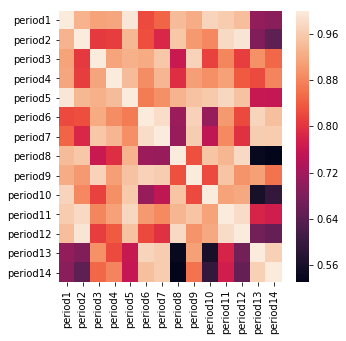

In [11]:
plt.figure(figsize=(5,5))
period_names = ["period{}".format(i) for i in range(1,15)]
sns.heatmap(cos_matrix, annot=False,
                xticklabels=period_names,
                yticklabels=period_names)
plt.show()

In [12]:
df_test = pd.read_csv("test.csv").iloc[:, 1:]
def standard_df(df):
    return (df - df_mean / df_std)
dft1 = standard_df(df_test[:40100])
dft2 = standard_df(df_test[40100:80200])
dft3 = standard_df(df_test[80200:120300])
dft4 = standard_df(df_test[120300:160500])
dft5 = standard_df(df_test[160500:200700])
dft6 = standard_df(df_test[200700:240900])
dft7 = standard_df(df_test[240900:281100])
dft8 = standard_df(df_test[281100:321300])
dft9 = standard_df(df_test[321300:361500])
means_t = []
for i in range(1,10):
    means_t.append(eval("dft{}".format(i)).mean().as_matrix())
means_t = np.array(means_t)

0.99989704197


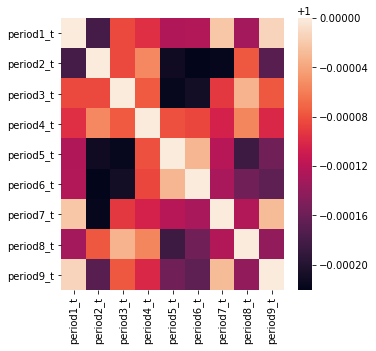

In [14]:
dot_matrix_t = np.dot(means_t, means_t.T)
norm_matrix_t = np.linalg.norm(means_t, axis=1)[:, np.newaxis] * np.linalg.norm(means_t, axis=1)[np.newaxis, :]
dot_matrix_t[norm_matrix_t == 0] = 0
dot_matrix_t[dot_matrix_t < 0] = 0
norm_matrix_t[norm_matrix_t == 0] = 1
cos_matrix_t = dot_matrix_t / norm_matrix_t
print(cos_matrix_t.mean())
plt.figure(figsize=(5,5))
period_names_t = ["period{}_t".format(i) for i in range(1,10)]
sns.heatmap(cos_matrix_t, annot=False,
                xticklabels=period_names_t,
                yticklabels=period_names_t)
plt.show()

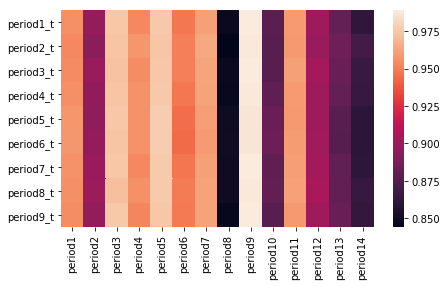

In [15]:
dot_matrix_x = np.dot(means_t, means.T)
norm_matrix_x = np.linalg.norm(means, axis=1)[np.newaxis, :] * np.linalg.norm(means_t, axis=1)[:, np.newaxis]
dot_matrix_x[norm_matrix_x == 0] = 0
dot_matrix_x[dot_matrix_x < 0] = 0
norm_matrix_x[norm_matrix_x == 0] = 1
cos_matrix_x = dot_matrix_x / norm_matrix_x
plt.figure(figsize=(7,4))
sns.heatmap(cos_matrix_x, annot=False,
                xticklabels=period_names,
                yticklabels=period_names_t)
plt.show()

In [17]:
cos_matrix_x.mean(axis=0)

array([ 0.95575211,  0.89792417,  0.97469554,  0.95530451,  0.97622791,
        0.94789972,  0.96199544,  0.84788787,  0.98823136,  0.8796661 ,
        0.96002994,  0.90167197,  0.88123974,  0.8636035 ])

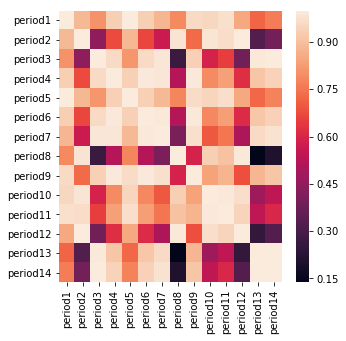

In [20]:
means_5 = []
index = np.array([12, 80, 48, 76,81]) -1
for i in range(1,15):
    means_5.append(eval("standardized_df{}".format(i)).iloc[:, index].mean().as_matrix())
means_5 = np.array(means_5)
dot_matrix = np.dot(means_5, means_5.T)
norm_matrix = np.linalg.norm(means_5, axis=1)[:, np.newaxis] * np.linalg.norm(means_5, axis=1)[np.newaxis, :]
dot_matrix[norm_matrix == 0] = 0
dot_matrix[dot_matrix < 0] = 0
norm_matrix[norm_matrix == 0] = 1
cos_matrix = dot_matrix / norm_matrix
plt.figure(figsize=(5,5))
period_names = ["period{}".format(i) for i in range(1,15)]
sns.heatmap(cos_matrix, annot=False,
                xticklabels=period_names,
                yticklabels=period_names)
plt.show()

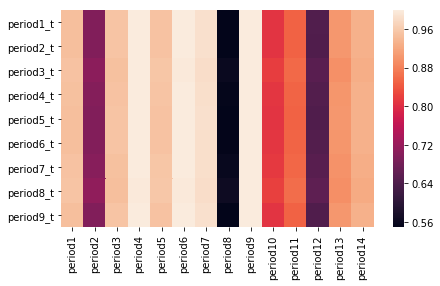

In [21]:
means_t_5 = []
for i in range(1,10):
    means_t_5.append(eval("dft{}".format(i)).iloc[:, index].mean().as_matrix())
means_t_5 = np.array(means_t_5)
dot_matrix_x = np.dot(means_t_5, means_5.T)
norm_matrix_x = np.linalg.norm(means_5, axis=1)[np.newaxis, :] * np.linalg.norm(means_t_5, axis=1)[:, np.newaxis]
dot_matrix_x[norm_matrix_x == 0] = 0
dot_matrix_x[dot_matrix_x < 0] = 0
norm_matrix_x[norm_matrix_x == 0] = 1
cos_matrix_x = dot_matrix_x / norm_matrix_x
plt.figure(figsize=(7,4))
sns.heatmap(cos_matrix_x, annot=False,
                xticklabels=period_names,
                yticklabels=period_names_t)
plt.show()